In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Carregar o arquivo para entender a estrutura inicial
file_path = 'SQL_M8_support material_exercise_credit.csv'
data = pd.read_csv(file_path)

In [4]:
# Visualizar uma amostra dos dados
print("Amostra dos dados:")
data.head(10)

Amostra dos dados:


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


# Compreensão do Dataset e Definição de Objetivos

Estamos explorando uma base de dados sobre o comportamento de clientes em um sistema de crédito, com informações demográficas, financeiras e comportamentais. Essa análise busca identificar quem são os clientes, como utilizam os produtos financeiros e quais padrões emergem.

**Objetivo**: Extrair insights sobre comportamento, segmentar perfis, e destacar fatores que apoiem decisões estratégicas, como limites de crédito e otimização de produtos.

Perguntas-chave:

- Quais são os perfis principais dos clientes (idade, sexo, estado civil)?
- Como se distribuem os dados financeiros (salário, limites, transações)?
- Existem padrões claros de interação e frequência de uso?
- Esses insights servirão de base para decisões mais estratégicas e informadas.

In [12]:
# Visualizar uma amostra dos dados
print("Amostra dos dados:")
data.head(10)

Amostra dos dados:


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


In [13]:
# Estatísticas básicas
print("\nInformações gerais sobre o dataset:")
data.info()


Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idade                 2564 non-null   int64  
 1   sexo                  2564 non-null   object 
 2   dependentes           2564 non-null   int64  
 3   escolaridade          2564 non-null   object 
 4   estado_civil          2564 non-null   object 
 5   salario_anual         2564 non-null   object 
 6   tipo_cartao           2564 non-null   object 
 7   qtd_produtos          2564 non-null   int64  
 8   iteracoes_12m         2564 non-null   int64  
 9   meses_inativo_12m     2564 non-null   int64  
 10  limite_credito        2564 non-null   float64
 11  valor_transacoes_12m  2564 non-null   float64
 12  qtd_transacoes_12m    2564 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 260.5+ KB


In [14]:
print("\nEstatísticas descritivas para variáveis numéricas:")
data.describe()


Estatísticas descritivas para variáveis numéricas:


,idade,dependentes,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,45.907956,2.093214,4.356864,2.569813,2.269891,9072.720293,1820.326100,41.704368
std,9.826038,1.306176,1.263008,1.119909,0.986692,8751.423251,689.003731,15.137243
min,26.000000,0.000000,1.000000,0.000000,0.000000,1438.030000,510.160000,10.000000
25%,38.000000,1.000000,3.000000,2.000000,2.000000,2926.712500,1352.967500,31.000000
50%,46.000000,2.000000,4.000000,3.000000,2.000000,5481.845000,1665.915000,39.000000
75%,54.000000,3.000000,5.000000,3.000000,3.000000,11931.512500,2156.945000,51.000000
max,73.000000,5.000000,6.000000,5.000000,6.000000,34516.990000,4776.580000,103.000000


# Identificação de Variáveis Relevantes e Contexto

Compreender as variáveis disponíveis é essencial para uma análise eficaz. Cada coluna do dataset tem um papel específico no contexto de concessão de crédito, permitindo explorar comportamentos e padrões dos clientes.

| **Variável**                     | **Contexto**                                                                 |
|----------------------------------|------------------------------------------------------------------------------|
| **Idade**                        | Segmenta clientes por gerações, revelando diferenças de comportamento.       |
| **Sexo**                         | Identifica variações financeiras e comportamentais por gênero.              |
| **Dependentes**                  | Reflete responsabilidades financeiras que podem impactar o perfil de crédito.|
| **Escolaridade**                 | Influencia padrões de consumo e escolhas financeiras.                       |
| **Estado civil**                 | Relaciona-se a prioridades financeiras, como gastos familiares.             |
| **Salário anual**                | Mede a capacidade financeira do cliente.                                    |
| **Tipo de cartão**               | Categoriza o uso de produtos financeiros.                                   |
| **Quantidade de produtos**       | Indica a diversidade de produtos financeiros usados.                        |
| **Interações nos últimos 12 meses** | Mostra a frequência de engajamento.                                         |
| **Meses inativos**               | Aponta períodos de baixa atividade, sugerindo insatisfação ou desinteresse. |
| **Limite de crédito**            | Principal indicador para concessão de crédito.                              |
| **Valor de transações (12 meses)** | Mede o volume financeiro movimentado.                                       |
| **Quantidade de transações (12 meses)** | Reflete a frequência de uso.                                             |


In [15]:
# Listar colunas e seus tipos
print("Colunas e tipos de dados:")
data.dtypes

Colunas e tipos de dados:


idade                     int64
sexo                     object
dependentes               int64
escolaridade             object
estado_civil             object
salario_anual            object
tipo_cartao              object
qtd_produtos              int64
iteracoes_12m             int64
meses_inativo_12m         int64
limite_credito          float64
valor_transacoes_12m    float64
qtd_transacoes_12m        int64
dtype: object

#  Entender possíveis impactos sociais e éticos dos insights

Antes da análise, é crucial avaliar as implicações sociais e éticas dos insights. No caso de crédito, decisões baseadas em dados podem afetar diretamente os clientes, exigindo que a análise seja ética, justa e não reforce desigualdades.

| **Categoria**                | **Questões**                                                                              |
|-------------------------------|-------------------------------------------------------------------------------------------|
| **Privacidade e Uso de Dados**| - Os dados foram coletados eticamente e com consentimento?                                |
|                               | - Há informações identificáveis? Caso sim, devem ser anonimizadas.                        |
| **Imparcialidade**            | - Existe viés nas variáveis (gênero, estado civil)?                                       |
|                               | - Como reduzir esses vieses?                                                              |
| **Impacto Social**            | - Como os insights impactam os grupos representados?                                      |
|                               | - Há risco de exclusão de algum grupo?                                                    |
| **Transparência**             | - Os critérios da análise são explicáveis e justificados?                                 |
|                               | - Quais padrões éticos estão sendo seguidos?                                             |


In [23]:
# Distribuição por sexo e estado civil
print("Distribuição por sexo:")
print(data['sexo'].value_counts())

Distribuição por sexo:
sexo
M    1563
F    1001
Name: count, dtype: int64


In [24]:
print("\nDistribuição por estado civil:")
print(data['estado_civil'].value_counts())


Distribuição por estado civil:
estado_civil
casado        1521
solteiro       766
divorciado     161
na             116
Name: count, dtype: int64


In [27]:
# Análise cruzada entre sexo e estado civil
print("\nDistribuição cruzada entre sexo e estado civil:")
pd.crosstab(data['sexo'], data['estado_civil'])


Distribuição cruzada entre sexo e estado civil:


estado_civil,casado,divorciado,na,solteiro
sexo,,,,
F,591,69,33,308
M,930,92,83,458


Essa etapa ajuda a identificar onde devemos ser cuidadosos na interpretação dos dados. Assim, podemos mitigar qualquer impacto negativo durante a extração de insights.

# Verificar a estrutura do dataset (dimensão, tipos de dados, valores ausentes).

A inspeção inicial é como abrir uma caixa de ferramentas: queremos saber o que temos em mãos, em que estado estão os dados e se precisamos fazer ajustes antes de mergulhar na análise. Nesta etapa, verificamos a estrutura do dataset, avaliamos se há valores ausentes ou discrepantes e confirmamos que os tipos de dados estão corretamente atribuídos. Esses passos são fundamentais para garantir que a base esteja pronta para exploração e para evitar interpretações errôneas.

**Objetivos da Etapa**:
- Confirmar as dimensões do dataset (linhas e colunas).
- Listar os tipos de dados para identificar possíveis ajustes.
- Verificar a existência de valores ausentes.
- Avaliar a necessidade de transformação ou limpeza.

In [30]:
# Dimensão do dataset
print("Dimensão do dataset (linhas, colunas):")
data.shape

Dimensão do dataset (linhas, colunas):


(2564, 13)

In [31]:
# Tipos de dados e resumo inicial
print("\nInformações sobre os tipos de dados e valores não nulos:")
data.info()


Informações sobre os tipos de dados e valores não nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idade                 2564 non-null   int64  
 1   sexo                  2564 non-null   object 
 2   dependentes           2564 non-null   int64  
 3   escolaridade          2564 non-null   object 
 4   estado_civil          2564 non-null   object 
 5   salario_anual         2564 non-null   object 
 6   tipo_cartao           2564 non-null   object 
 7   qtd_produtos          2564 non-null   int64  
 8   iteracoes_12m         2564 non-null   int64  
 9   meses_inativo_12m     2564 non-null   int64  
 10  limite_credito        2564 non-null   float64
 11  valor_transacoes_12m  2564 non-null   float64
 12  qtd_transacoes_12m    2564 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 260.5+ KB


In [32]:
# Verificar valores ausentes por coluna
print("\nValores ausentes por coluna:")
data.isnull().sum()


Valores ausentes por coluna:


idade                   0
sexo                    0
dependentes             0
escolaridade            0
estado_civil            0
salario_anual           0
tipo_cartao             0
qtd_produtos            0
iteracoes_12m           0
meses_inativo_12m       0
limite_credito          0
valor_transacoes_12m    0
qtd_transacoes_12m      0
dtype: int64

In [33]:
# Exemplo de registros com valores ausentes (se existirem)
if data.isnull().sum().sum() > 0:
    print("\nExemplos de registros com valores ausentes:")
    print(data[data.isnull().any(axis=1)].head())
else:
    print("\nNão há valores ausentes no dataset.")


Não há valores ausentes no dataset.


# Garantir que não há valores discrepantes ou erros de entrada.

Valores discrepantes ou erros de entrada podem distorcer nossa análise e levar a conclusões equivocadas. Nesta etapa, buscamos garantir que todos os dados estão dentro de limites razoáveis e consistentes com o contexto. Por exemplo, não esperamos encontrar idades negativas, salários irreais ou categorias inexistentes. Detectar e corrigir essas inconsistências fortalece a confiabilidade dos insights extraídos.

**Objetivos da Etapa**
- Identificar valores fora dos limites esperados em variáveis numéricas.
- Verificar inconsistências em variáveis categóricas (ex.: categorias inesperadas ou mal escritas).
- Determinar como lidar com valores discrepantes ou inconsistentes.

In [34]:
# Verificar valores extremos em variáveis numéricas
print("Resumo estatístico das variáveis numéricas:")
data.describe()

Resumo estatístico das variáveis numéricas:


,idade,dependentes,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,45.907956,2.093214,4.356864,2.569813,2.269891,9072.720293,1820.326100,41.704368
std,9.826038,1.306176,1.263008,1.119909,0.986692,8751.423251,689.003731,15.137243
min,26.000000,0.000000,1.000000,0.000000,0.000000,1438.030000,510.160000,10.000000
25%,38.000000,1.000000,3.000000,2.000000,2.000000,2926.712500,1352.967500,31.000000
50%,46.000000,2.000000,4.000000,3.000000,2.000000,5481.845000,1665.915000,39.000000
75%,54.000000,3.000000,5.000000,3.000000,3.000000,11931.512500,2156.945000,51.000000
max,73.000000,5.000000,6.000000,5.000000,6.000000,34516.990000,4776.580000,103.000000


In [38]:
# Listar categorias únicas para variáveis categóricas
categorial_columns = ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao']
print("\nCategorias únicas em variáveis categóricas:")
for col in categorial_columns:
    print(f"{col}: {data[col].unique()}")


Categorias únicas em variáveis categóricas:
sexo: ['M' 'F']
escolaridade: ['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado']
estado_civil: ['casado' 'solteiro' 'na' 'divorciado']
tipo_cartao: ['blue' 'gold' 'silver' 'platinum']


In [39]:
# Identificar possíveis valores inconsistentes em variáveis categóricas
for col in categorial_columns:
    print(f"\nContagem de valores para {col}:")
    print(data[col].value_counts())


Contagem de valores para sexo:
sexo
M    1563
F    1001
Name: count, dtype: int64

Contagem de valores para escolaridade:
escolaridade
mestrado               810
ensino medio           545
sem educacao formal    367
na                     346
graduacao              261
doutorado              235
Name: count, dtype: int64

Contagem de valores para estado_civil:
estado_civil
casado        1521
solteiro       766
divorciado     161
na             116
Name: count, dtype: int64

Contagem de valores para tipo_cartao:
tipo_cartao
blue        2453
silver        93
gold          16
platinum       2
Name: count, dtype: int64


In [45]:
# Identificar registros com valores extremos (exemplo: idade menor que 0)
print("\nRegistros com idade menor que 0 (se existirem):")
data[data['idade'] < 0]


Registros com idade menor que 0 (se existirem):


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m


In [48]:
# Outliers para variáveis contínuas (limite_credito, valor_transacoes_12m)
print("\nOutliers no limite de crédito (acima de 3 desvios padrão):")
limite_mean = data['limite_credito'].mean()
limite_std = data['limite_credito'].std()
outliers_limite = data[np.abs(data['limite_credito'] - limite_mean) > (3 * limite_std)]
outliers_limite


Outliers no limite de crédito (acima de 3 desvios padrão):


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m


# Ajustar formatos e categorias, caso necessário

Dados inconsistentes podem comprometer análises e gerar interpretações equivocadas. Nesta etapa, corrigimos formatos de variáveis (como números armazenados como texto) e garantimos que categorias de variáveis qualitativas estejam padronizadas e coerentes. Essa abordagem assegura que o dataset esteja limpo, legível e pronto para análises mais profundas.

**Objetivos da Etapa**
- Converter tipos de dados inconsistentes para formatos adequados (ex.: salários em formato numérico).
- Padronizar categorias (ex.: corrigir diferenças de capitalização ou erros de digitação).
- Validar as alterações aplicadas para assegurar que o dataset permaneça íntegro.

In [49]:
# Converter salário para formato numérico
print("Convertendo 'salario_anual' para numérico...")
data['salario_anual'] = pd.to_numeric(data['salario_anual'], errors='coerce')

Convertendo 'salario_anual' para numérico...


In [50]:
# Padronizar categorias: remover espaços extras e uniformizar para letras minúsculas
categorical_columns = ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao']
for col in categorical_columns:
    print(f"Padronizando coluna '{col}'...")
    data[col] = data[col].str.strip().str.lower()

Padronizando coluna 'sexo'...
Padronizando coluna 'escolaridade'...
Padronizando coluna 'estado_civil'...
Padronizando coluna 'tipo_cartao'...


In [52]:
# Verificar os ajustes realizados
print("\nVerificação após ajustes:")
print("Tipos de dados:")
data.dtypes


Verificação após ajustes:
Tipos de dados:


idade                     int64
sexo                     object
dependentes               int64
escolaridade             object
estado_civil             object
salario_anual           float64
tipo_cartao              object
qtd_produtos              int64
iteracoes_12m             int64
meses_inativo_12m         int64
limite_credito          float64
valor_transacoes_12m    float64
qtd_transacoes_12m        int64
dtype: object

In [53]:
print("\nCategorias únicas após padronização:")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


Categorias únicas após padronização:
sexo: ['m' 'f']
escolaridade: ['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado']
estado_civil: ['casado' 'solteiro' 'na' 'divorciado']
tipo_cartao: ['blue' 'gold' 'silver' 'platinum']


In [54]:
# Exibir exemplos de dados ajustados
print("\nPrimeiros registros após ajustes:")
data.head()


Primeiros registros após ajustes:


,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,m,3,ensino medio,casado,NaN,blue,5,3,1,12691.51,1144.90,42
1,49,f,5,mestrado,solteiro,NaN,blue,6,2,1,8256.96,1291.45,33
2,51,m,3,mestrado,casado,NaN,blue,4,0,1,3418.56,1887.72,20
3,40,f,4,ensino medio,na,NaN,blue,3,1,4,3313.03,1171.56,20
4,40,m,3,sem educacao formal,casado,NaN,blue,5,0,1,4716.22,816.08,28


Com essas etapas, garantimos que os dados estão no formato ideal para análise, eliminando ambiguidades e inconsistências.

# Explorar a distribuição das variáveis numéricas (média, mediana, desvios)

A análise univariada é o momento em que olhamos cada variável de forma isolada para entender suas características e comportamentos. Para as variáveis numéricas, isso inclui calcular métricas descritivas como média, mediana e desvio padrão, além de visualizar suas distribuições. Essa etapa ajuda a identificar padrões, outliers e tendências iniciais, sendo crucial para a construção de insights mais profundos.

**Objetivos da Etapa**
- Examinar a distribuição central (média, mediana) e a dispersão (desvio padrão, amplitude) das variáveis numéricas.
- Identificar possíveis assimetrias ou anomalias nas distribuições.
- Criar visualizações para reforçar a compreensão.

In [57]:
# Estatísticas descritivas
print("Estatísticas descritivas para variáveis numéricas:")
data.describe()

Estatísticas descritivas para variáveis numéricas:


,idade,dependentes,salario_anual,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,2564.000000,2564.000000,0.0,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,45.907956,2.093214,NaN,4.356864,2.569813,2.269891,9072.720293,1820.326100,41.704368
std,9.826038,1.306176,NaN,1.263008,1.119909,0.986692,8751.423251,689.003731,15.137243
min,26.000000,0.000000,NaN,1.000000,0.000000,0.000000,1438.030000,510.160000,10.000000
25%,38.000000,1.000000,NaN,3.000000,2.000000,2.000000,2926.712500,1352.967500,31.000000
50%,46.000000,2.000000,NaN,4.000000,3.000000,2.000000,5481.845000,1665.915000,39.000000
75%,54.000000,3.000000,NaN,5.000000,3.000000,3.000000,11931.512500,2156.945000,51.000000
max,73.000000,5.000000,NaN,6.000000,5.000000,6.000000,34516.990000,4776.580000,103.000000


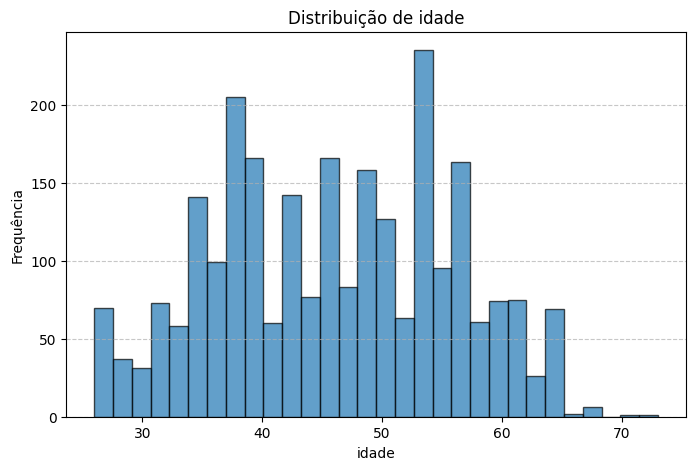

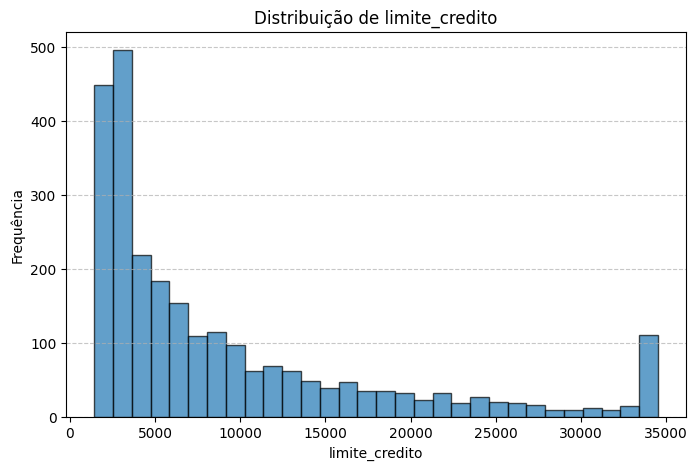

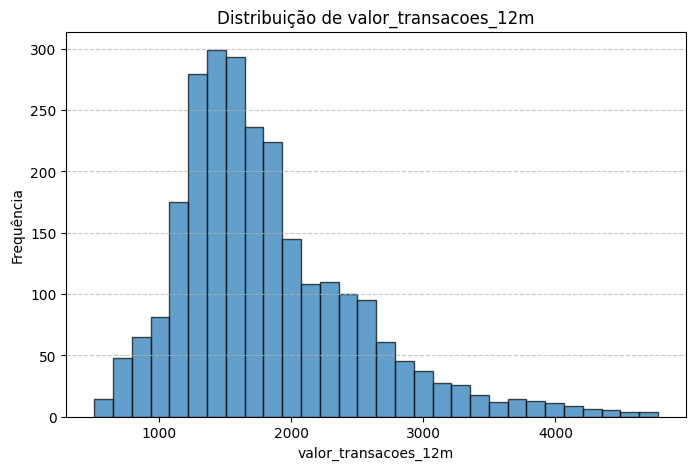

In [58]:
# Visualizar distribuições numéricas
numerical_columns = ['idade', 'limite_credito', 'valor_transacoes_12m']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Analisar proporções e frequências das variáveis categóricas

As variáveis categóricas fornecem informações qualitativas que ajudam a segmentar e compreender diferentes grupos no dataset. Nesta etapa, analisamos as proporções de cada categoria para identificar quais são predominantes, como os dados estão distribuídos e se há desequilíbrios que merecem atenção. A visualização dessas proporções também torna mais clara a composição do dataset.

**Objetivos da Etapa**
- Calcular as frequências absolutas e relativas de cada categoria.
- Identificar desequilíbrios ou padrões importantes.
- Criar gráficos para visualizar a distribuição das categorias.

In [59]:
# Variáveis categóricas a serem analisadas
categorical_columns = ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao']


Frequências para sexo:
sexo
m    60.959438
f    39.040562
Name: proportion, dtype: float64


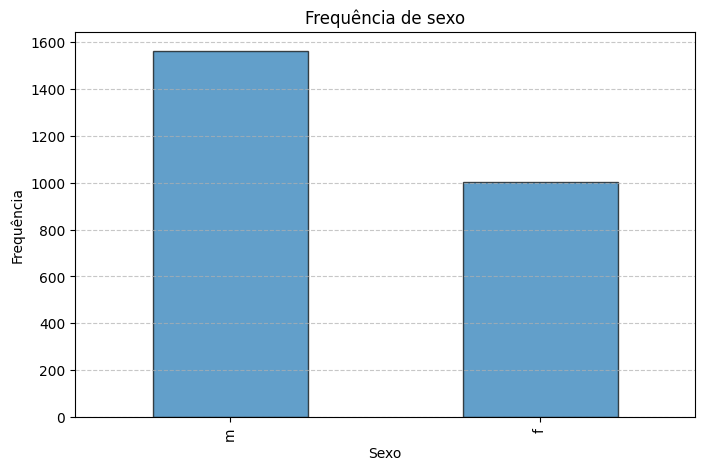

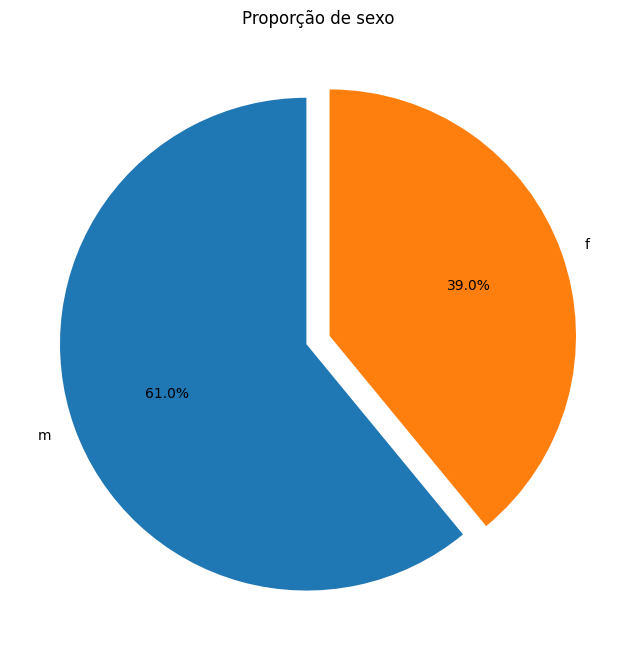


Frequências para escolaridade:
escolaridade
mestrado               31.591264
ensino medio           21.255850
sem educacao formal    14.313573
na                     13.494540
graduacao              10.179407
doutorado               9.165367
Name: proportion, dtype: float64


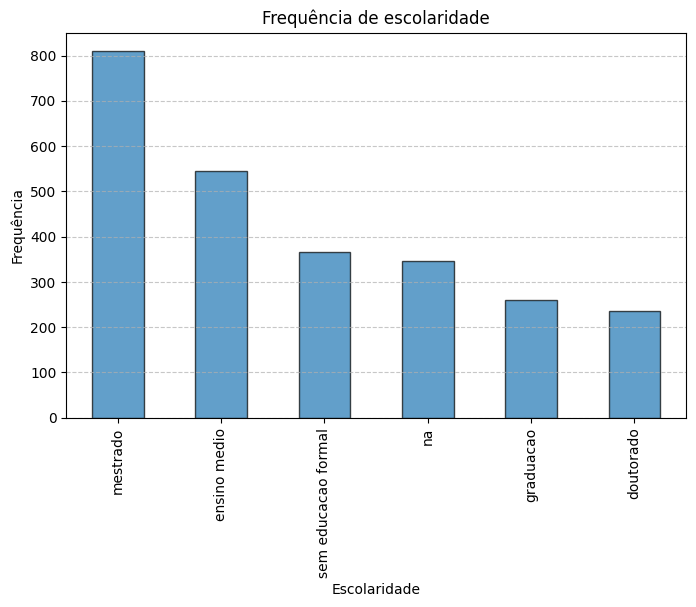

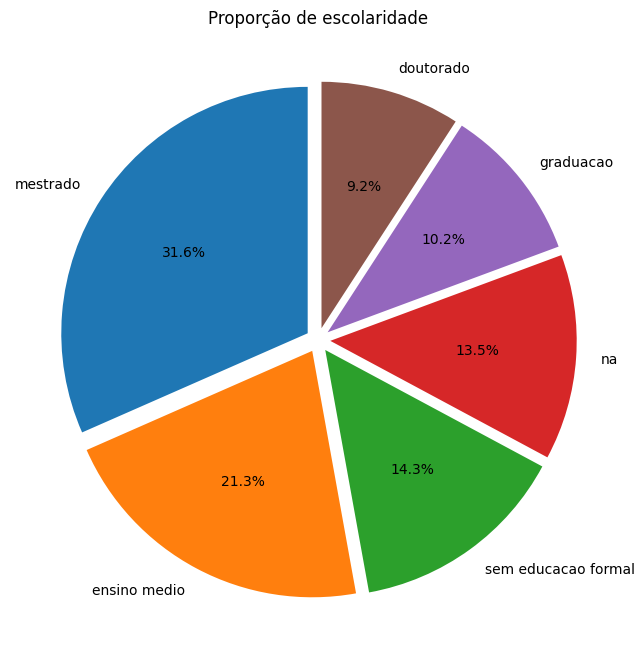


Frequências para estado_civil:
estado_civil
casado        59.321373
solteiro      29.875195
divorciado     6.279251
na             4.524181
Name: proportion, dtype: float64


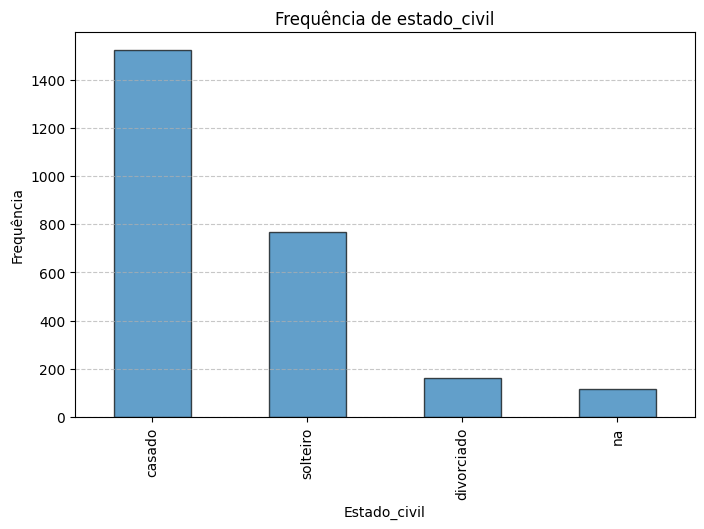

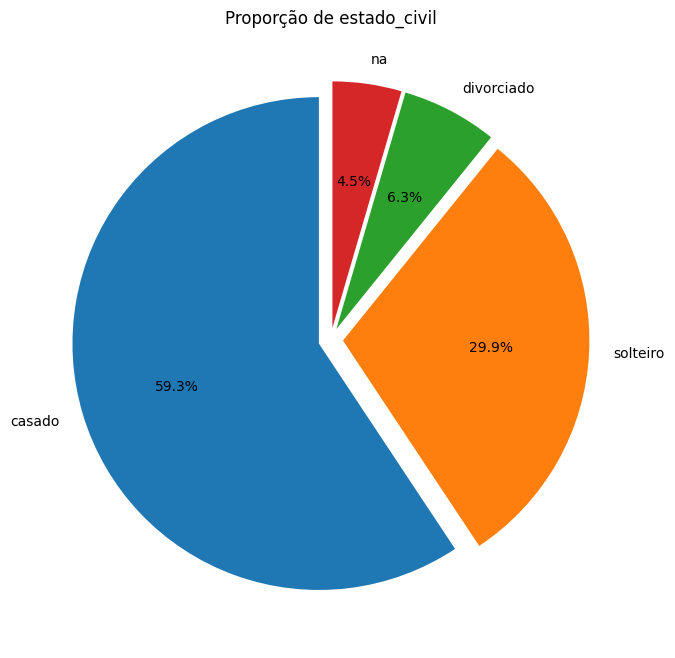


Frequências para tipo_cartao:
tipo_cartao
blue        95.670827
silver       3.627145
gold         0.624025
platinum     0.078003
Name: proportion, dtype: float64


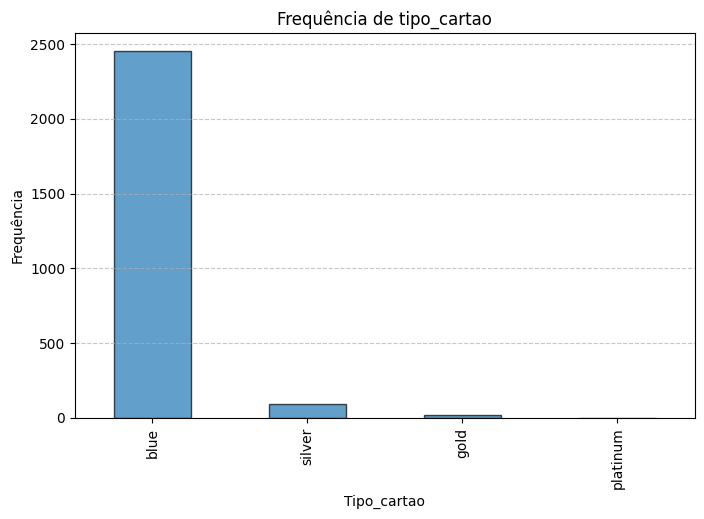

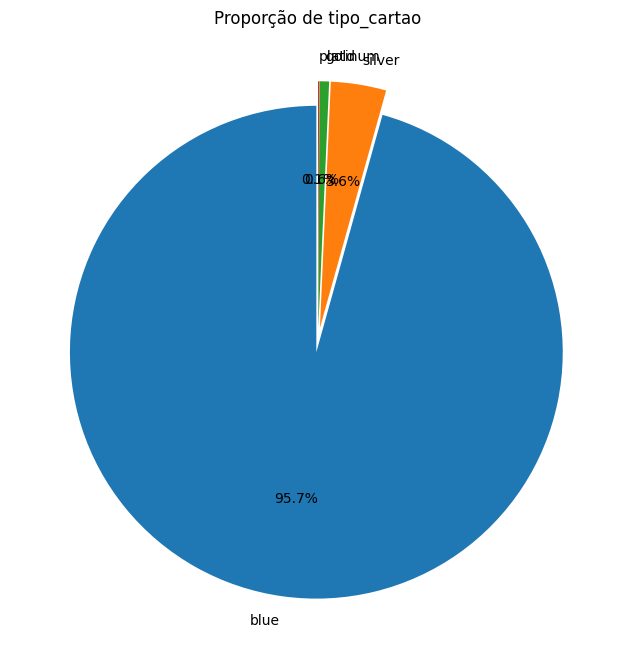

In [60]:
# Analisar proporções e criar gráficos
for col in categorical_columns:
    print(f"\nFrequências para {col}:")
    print(data[col].value_counts(normalize=True) * 100)  # Proporções em %

    # Gráfico de barras
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f"Frequência de {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Gráfico de setores (pie chart)
    plt.figure(figsize=(8, 8))
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.05]*len(data[col].value_counts()))
    plt.title(f"Proporção de {col}")
    plt.ylabel("")  # Remove rótulo do eixo Y
    plt.show()

# Identificar outliers e padrões nas distribuições.

Os outliers são pontos que se desviam significativamente do restante dos dados, podendo representar erros, casos extremos ou até mesmo padrões valiosos. Nesta etapa, buscamos identificar outliers em variáveis numéricas e explorar como eles podem influenciar as distribuições. Além disso, analisamos padrões para entender as características principais de cada variável.

**Objetivos da Etapa**
- Detectar outliers em variáveis numéricas usando métodos estatísticos como o IQR (Intervalo Interquartil) e desvios padrão.
- Visualizar distribuições para identificar padrões e assimetrias.
- Determinar se os outliers são relevantes ou devem ser tratados (removidos, corrigidos ou isolados).

In [61]:
# Função para identificar outliers usando IQR
def detect_outliers_iqr(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [62]:
# Variáveis numéricas para análise
numerical_columns = ['idade', 'limite_credito', 'valor_transacoes_12m']


Analisando 'idade':
Limites: [14.00, 78.00]
Outliers detectados: 0


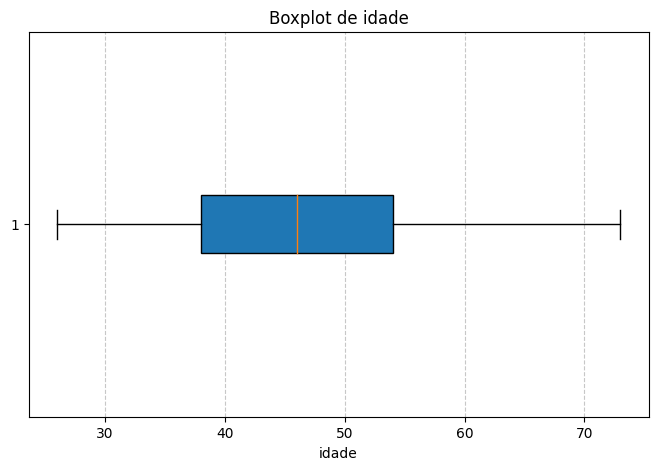


Analisando 'limite_credito':
Limites: [-10580.49, 25438.71]
Outliers detectados: 203


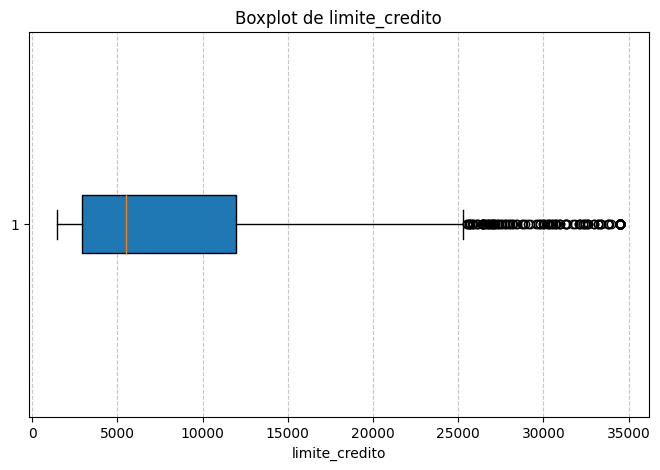


Analisando 'valor_transacoes_12m':
Limites: [147.00, 3362.91]
Outliers detectados: 95


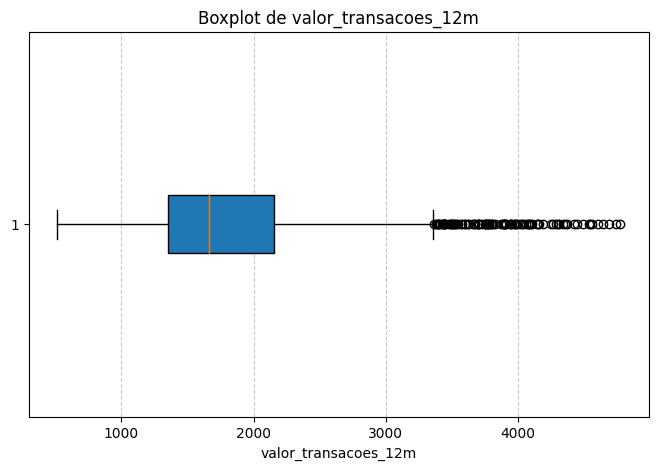

In [63]:
# Identificar outliers e visualizá-los
for col in numerical_columns:
    print(f"\nAnalisando '{col}':")
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"Limites: [{lower:.2f}, {upper:.2f}]")
    print(f"Outliers detectados: {len(outliers)}")

    # Boxplot para visualizar outliers
    plt.figure(figsize=(8, 5))
    plt.boxplot(data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

- Outliers: Determinamos quais pontos estão fora dos limites esperados e avaliamos se são anomalias ou casos interessantes.

- Padrões: Observamos se há assimetrias ou concentrações que indicam comportamentos específicos no dataset.

# 	Explorar como variáveis se relacionam entre si.

A análise bivariada nos ajuda a entender como duas variáveis se relacionam. Esta etapa é crucial para identificar padrões de associação, como correlações entre variáveis numéricas ou a influência de categorias em valores contínuos. Essas relações são importantes para gerar insights mais profundos e fundamentar decisões baseadas nos dados.

**Objetivos da Etapa**
- Avaliar relações entre variáveis numéricas, como correlação e tendências.
- Examinar interações entre variáveis categóricas e numéricas.
- Identificar padrões ou associações significativas.


In [66]:
# Filtrar apenas as colunas numéricas
numerical_data = data.select_dtypes(include=['number'])

In [67]:
# Correlação entre variáveis numéricas
print("Correlação entre variáveis numéricas:")
numerical_data.corr()

Correlação entre variáveis numéricas:


,idade,dependentes,salario_anual,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
idade,1.000000,-0.067396,NaN,-0.059790,-0.073306,0.004495,0.012920,-0.274570,-0.253683
dependentes,-0.067396,1.000000,NaN,0.002769,-0.064331,-0.036481,0.168681,-0.080882,-0.062720
salario_anual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtd_produtos,-0.059790,0.002769,NaN,1.000000,-0.011138,-0.054148,0.002783,0.168633,0.155743
iteracoes_12m,-0.073306,-0.064331,NaN,-0.011138,1.000000,0.036965,-0.036480,0.119092,0.103338
meses_inativo_12m,0.004495,-0.036481,NaN,-0.054148,0.036965,1.000000,-0.009341,0.003061,0.005214
limite_credito,0.012920,0.168681,NaN,0.002783,-0.036480,-0.009341,1.000000,-0.004686,0.015857
valor_transacoes_12m,-0.274570,-0.080882,NaN,0.168633,0.119092,0.003061,-0.004686,1.000000,0.827740
qtd_transacoes_12m,-0.253683,-0.062720,NaN,0.155743,0.103338,0.005214,0.015857,0.827740,1.000000


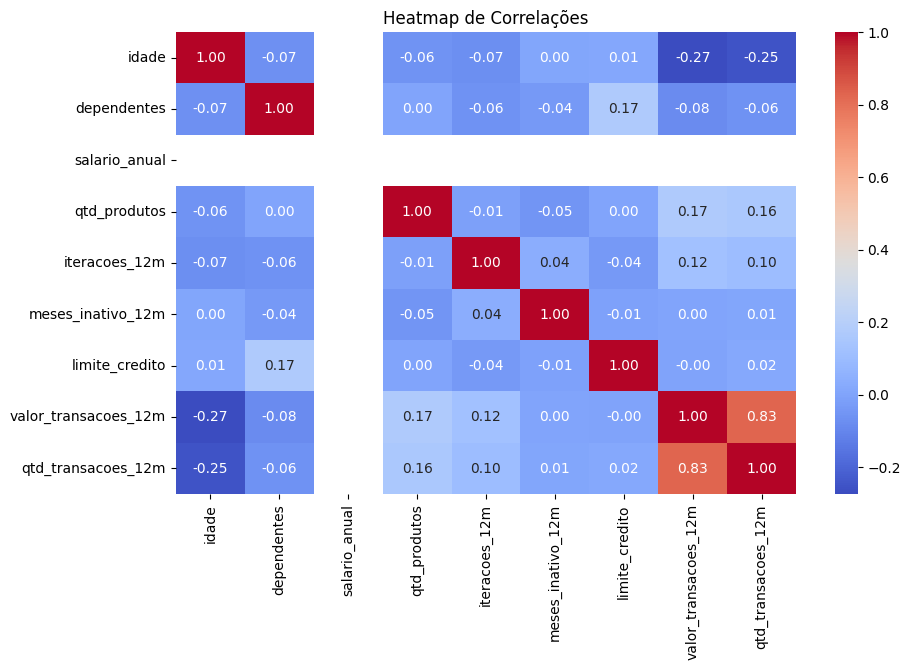

In [68]:
# Heatmap de correlações
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de Correlações")
plt.show()

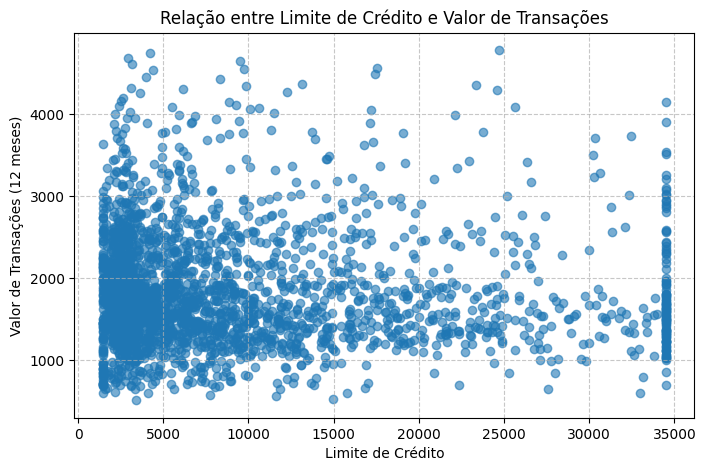

In [69]:
# Relação entre limite_credito e valor_transacoes_12m (gráfico de dispersão)
plt.figure(figsize=(8, 5))
plt.scatter(data['limite_credito'], data['valor_transacoes_12m'], alpha=0.6)
plt.title("Relação entre Limite de Crédito e Valor de Transações")
plt.xlabel("Limite de Crédito")
plt.ylabel("Valor de Transações (12 meses)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

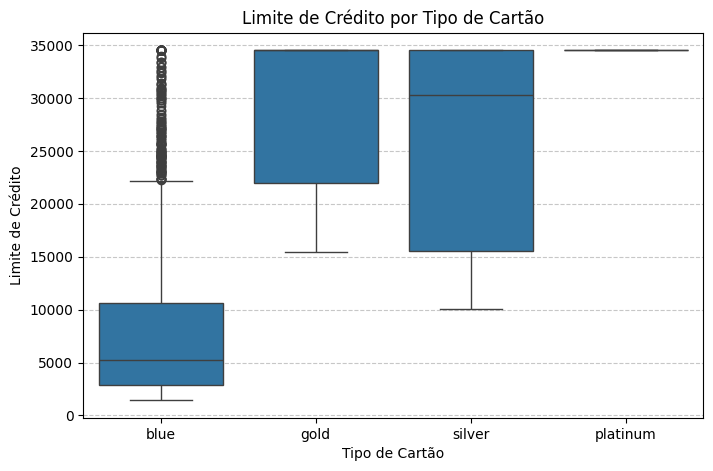

In [70]:
# Boxplot: Limite de crédito por tipo de cartão
plt.figure(figsize=(8, 5))
sns.boxplot(x='tipo_cartao', y='limite_credito', data=data)
plt.title("Limite de Crédito por Tipo de Cartão")
plt.xlabel("Tipo de Cartão")
plt.ylabel("Limite de Crédito")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Correlação Numérica: Avaliamos se há relação forte (positiva ou negativa) entre variáveis como limite de crédito e valor de transações.
- Impacto de Categorias: Identificamos como variáveis qualitativas, como tipo de cartão, influenciam métricas numéricas como limite de crédito.
- Visualizações: Gráficos revelam tendências ou outliers importantes.

# Usar tabelas de frequência cruzada para categóricas.

Tabelas de frequência cruzada ajudam a visualizar como duas variáveis categóricas interagem. Essa análise pode revelar padrões, como quais categorias predominam em outra ou se há alguma associação entre elas. Por exemplo, podemos descobrir a distribuição de tipos de cartão entre gêneros ou estados civis.

**Objetivos da Etapa**
- Criar tabelas de frequência cruzada para observar interações entre variáveis categóricas.
- Calcular proporções relativas para entender a representatividade de cada categoria.
- Identificar padrões relevantes ou desequilíbrios entre categorias.

In [72]:
# Tabelas de frequência cruzada
print("Frequência cruzada entre Sexo e Tipo de Cartão:")
sexo_tipo_cartao = pd.crosstab(data['sexo'], data['tipo_cartao'], normalize='index') * 100
sexo_tipo_cartao

Frequência cruzada entre Sexo e Tipo de Cartão:


tipo_cartao,blue,gold,platinum,silver
sexo,,,,
f,96.103896,0.499500,0.09990,3.296703
m,95.393474,0.703775,0.06398,3.838772


In [74]:
print("\nFrequência cruzada entre Estado Civil e Escolaridade:")
estado_escolaridade = pd.crosstab(data['estado_civil'], data['escolaridade'], normalize='index') * 100
estado_escolaridade


Frequência cruzada entre Estado Civil e Escolaridade:


escolaridade,doutorado,ensino medio,graduacao,mestrado,na,sem educacao formal
estado_civil,,,,,,
casado,9.401709,22.485207,9.467456,32.084155,12.163051,14.398422
divorciado,7.453416,16.770186,11.801242,30.434783,16.149068,17.391304
na,9.482759,21.551724,11.206897,31.034483,16.379310,10.344828
solteiro,9.007833,19.712794,11.096606,30.939948,15.143603,14.099217


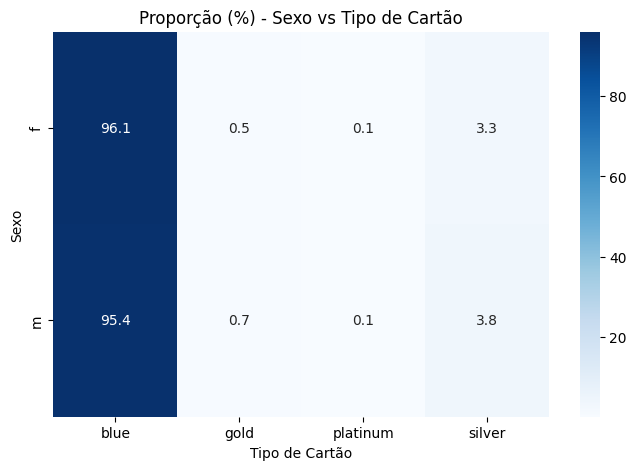

In [75]:
# Heatmap de proporções para frequência cruzada
plt.figure(figsize=(8, 5))
sns.heatmap(sexo_tipo_cartao, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("Proporção (%) - Sexo vs Tipo de Cartão")
plt.ylabel("Sexo")
plt.xlabel("Tipo de Cartão")
plt.show()

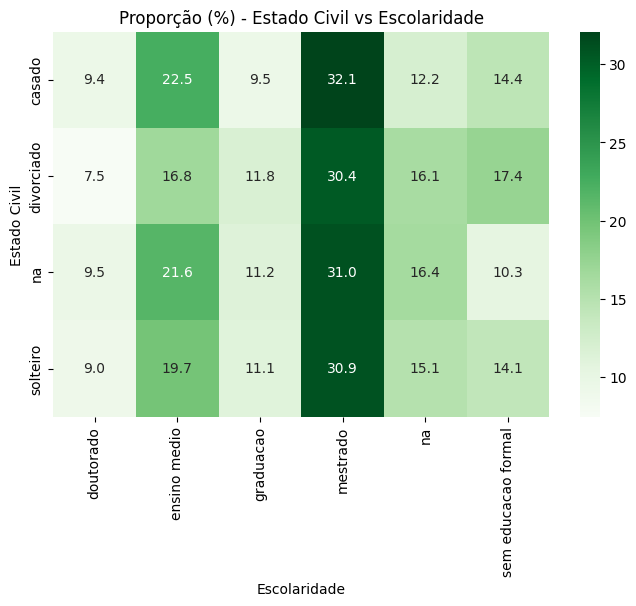

In [76]:
plt.figure(figsize=(8, 5))
sns.heatmap(estado_escolaridade, annot=True, fmt=".1f", cmap="Greens", cbar=True)
plt.title("Proporção (%) - Estado Civil vs Escolaridade")
plt.ylabel("Estado Civil")
plt.xlabel("Escolaridade")
plt.show()

# Analisar correlações entre variáveis numéricas.

A análise de correlações entre variáveis numéricas nos ajuda a entender como elas se relacionam. Correlações positivas indicam que, à medida que uma variável aumenta, a outra também tende a aumentar; já as negativas mostram uma relação inversa. Essa análise é fundamental para identificar dependências ou padrões que possam informar decisões estratégicas.

**Objetivos da Etapa**
- Calcular o coeficiente de correlação entre variáveis numéricas.
- Identificar relações fortes (positivas ou negativas).
- Visualizar as correlações em um heatmap para facilitar a interpretação.

In [81]:
# Calcular matriz de correlação
correlation_matrix = numerical_data.corr()

# Exibir matriz de correlação
print("Matriz de Correlação:")
correlation_matrix

Matriz de Correlação:


,idade,dependentes,salario_anual,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
idade,1.000000,-0.067396,NaN,-0.059790,-0.073306,0.004495,0.012920,-0.274570,-0.253683
dependentes,-0.067396,1.000000,NaN,0.002769,-0.064331,-0.036481,0.168681,-0.080882,-0.062720
salario_anual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtd_produtos,-0.059790,0.002769,NaN,1.000000,-0.011138,-0.054148,0.002783,0.168633,0.155743
iteracoes_12m,-0.073306,-0.064331,NaN,-0.011138,1.000000,0.036965,-0.036480,0.119092,0.103338
meses_inativo_12m,0.004495,-0.036481,NaN,-0.054148,0.036965,1.000000,-0.009341,0.003061,0.005214
limite_credito,0.012920,0.168681,NaN,0.002783,-0.036480,-0.009341,1.000000,-0.004686,0.015857
valor_transacoes_12m,-0.274570,-0.080882,NaN,0.168633,0.119092,0.003061,-0.004686,1.000000,0.827740
qtd_transacoes_12m,-0.253683,-0.062720,NaN,0.155743,0.103338,0.005214,0.015857,0.827740,1.000000


# Identificar possíveis tendências e interações.

A análise de tendências e interações entre variáveis nos permite identificar padrões complexos que ajudam a contar histórias mais completas sobre os dados. Ao observar como os valores de uma variável mudam em relação a outra, podemos encontrar interações significativas que orientam decisões estratégicas, como agrupamento de clientes ou comportamento de consumo.

**Objetivos da Etapa**
- Detectar tendências lineares ou não lineares em variáveis numéricas.
- Avaliar interações entre variáveis categóricas e numéricas.
- Visualizar essas tendências para facilitar a interpretação.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar faixas etárias
data['faixa_etaria'] = pd.cut(data['idade'], bins=[18, 25, 35, 45, 60, 100], 
                              labels=['18-25', '26-35', '36-45', '46-60', '60+'])

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\3302114755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_etaria_trend = data.groupby('faixa_etaria')['valor_transacoes_12m'].mean().reset_index()


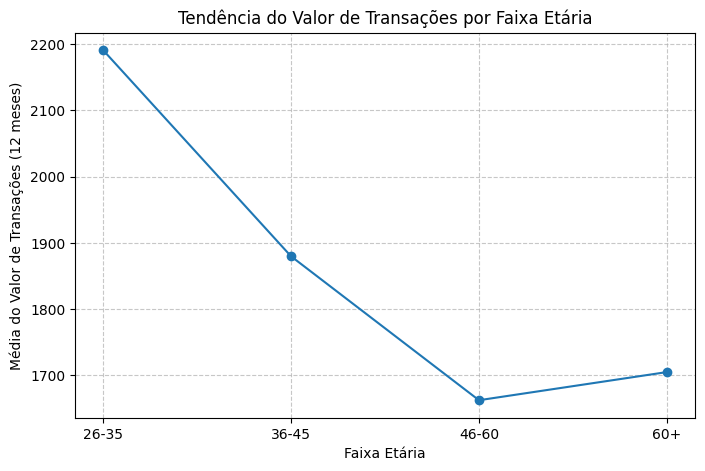

In [85]:
# Tendência de valor_transacoes_12m por faixa etária
faixa_etaria_trend = data.groupby('faixa_etaria')['valor_transacoes_12m'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(faixa_etaria_trend['faixa_etaria'], faixa_etaria_trend['valor_transacoes_12m'], marker='o')
plt.title("Tendência do Valor de Transações por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Média do Valor de Transações (12 meses)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

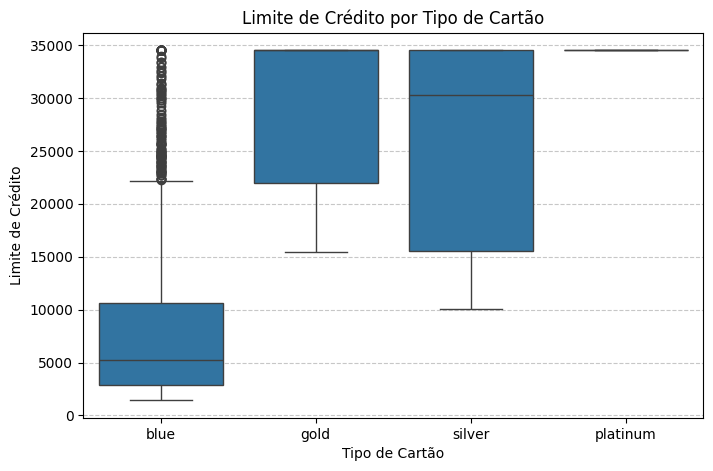

In [86]:
# Tendência de limite_credito por tipo_cartao
plt.figure(figsize=(8, 5))
sns.boxplot(x='tipo_cartao', y='limite_credito', data=data)
plt.title("Limite de Crédito por Tipo de Cartão")
plt.xlabel("Tipo de Cartão")
plt.ylabel("Limite de Crédito")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

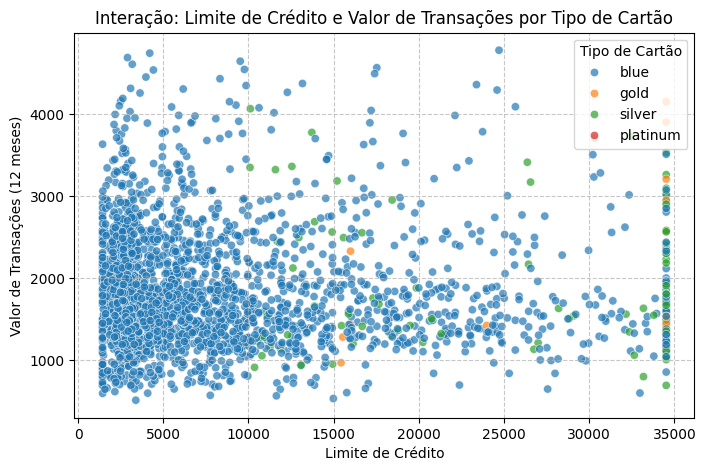

In [87]:
# Scatter plot entre limite_credito e valor_transacoes_12m, com cor por tipo_cartao
plt.figure(figsize=(8, 5))
sns.scatterplot(x='limite_credito', y='valor_transacoes_12m', hue='tipo_cartao', data=data, alpha=0.7)
plt.title("Interação: Limite de Crédito e Valor de Transações por Tipo de Cartão")
plt.xlabel("Limite de Crédito")
plt.ylabel("Valor de Transações (12 meses)")
plt.legend(title='Tipo de Cartão')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Procurar agrupamentos naturais nos dados (como tipos de clientes).

Segmentar os dados em grupos ajuda a identificar padrões de comportamento ou perfis de clientes. Esses agrupamentos naturais podem revelar insights importantes, como tipos de clientes com características semelhantes, padrões de uso de produtos financeiros ou tendências comportamentais. Utilizamos técnicas estatísticas e visuais para identificar esses segmentos.

**Objetivos da Etapa**
- Detectar agrupamentos naturais (clusters) nos dados com base em variáveis-chave.
- Identificar características predominantes em cada grupo.
- Usar visualizações para comunicar os perfis de clientes descobertos.

In [88]:
# Selecionar variáveis para clustering
clustering_data = data[['idade', 'limite_credito', 'valor_transacoes_12m']]

In [91]:
# Padronizar os dados para clustering
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [92]:
# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

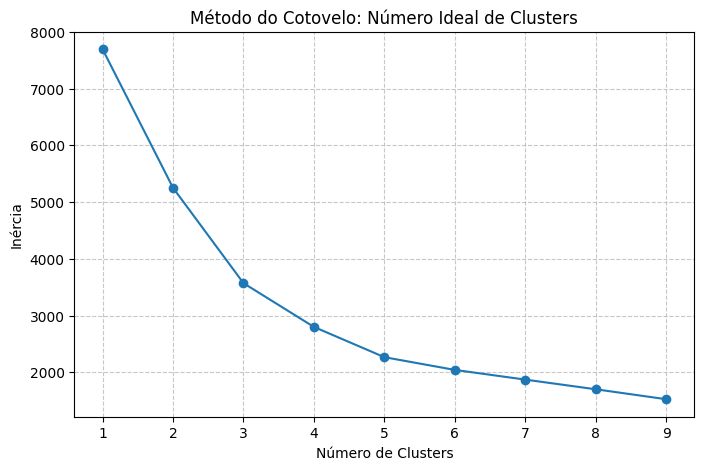

In [93]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Método do Cotovelo: Número Ideal de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [94]:
# Aplicar K-Means com o número ideal de clusters (exemplo: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

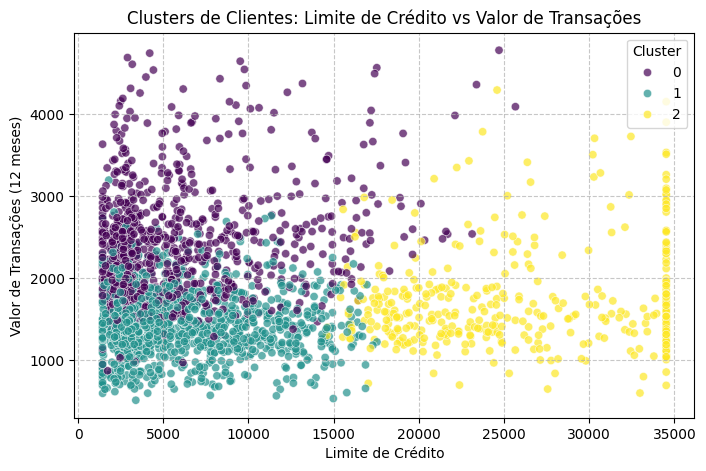

In [95]:
# Visualizar clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='limite_credito', y='valor_transacoes_12m', hue='cluster', data=data, palette='viridis', alpha=0.7)
plt.title("Clusters de Clientes: Limite de Crédito vs Valor de Transações")
plt.xlabel("Limite de Crédito")
plt.ylabel("Valor de Transações (12 meses)")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [97]:
# Analisar características dos clusters
cluster_summary = data.groupby('cluster')[['idade', 'limite_credito', 'valor_transacoes_12m']].mean()
print("\nMédias por Cluster:")
cluster_summary


Médias por Cluster:


,idade,limite_credito,valor_transacoes_12m
cluster,,,
0,36.483237,5909.282185,2398.596890
1,52.029389,5799.709536,1462.939977
2,46.492611,26236.210123,1726.473941


- Agrupamentos Naturais: Descobrimos grupos de clientes com características semelhantes.
- Perfis de Clientes: Identificamos as médias de idade, limite de crédito e valor de transações para cada cluster.

# Analisar perfis de comportamento por categoria ou faixa de valores.

Após identificar agrupamentos, analisar os perfis de comportamento em categorias ou faixas de valores permite entender características distintas dos grupos de clientes. Este processo é essencial para segmentação estratégica, como a definição de ações personalizadas para diferentes tipos de clientes ou para identificar potenciais oportunidades de negócio.

**Objetivos da Etapa**
- Definir perfis de comportamento com base em categorias ou faixas de valores.
- Identificar características exclusivas em diferentes segmentos de clientes.
- Gerar visualizações para facilitar a comunicação dos perfis descobertos.

In [98]:
# Categorizar limite de crédito em faixas
data['faixa_limite_credito'] = pd.cut(data['limite_credito'], 
                                      bins=[0, 5000, 15000, data['limite_credito'].max()], 
                                      labels=['Baixo', 'Médio', 'Alto'])

In [100]:
# Categorizar idade em faixas
data['faixa_etaria'] = pd.cut(data['idade'], bins=[18, 25, 35, 45, 60, 100], 
                              labels=['18-25', '26-35', '36-45', '46-60', '60+'])

In [101]:
# Perfil por faixa de limite de crédito e tipo de cartão
perfil_limite = data.groupby(['faixa_limite_credito', 'tipo_cartao']).agg({
    'valor_transacoes_12m': 'mean',
    'iteracoes_12m': 'mean'
}).reset_index()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\1440417934.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_limite = data.groupby(['faixa_limite_credito', 'tipo_cartao']).agg({


In [102]:
print("\nPerfil por Faixa de Limite de Crédito e Tipo de Cartão:")
perfil_limite


Perfil por Faixa de Limite de Crédito e Tipo de Cartão:


,faixa_limite_credito,tipo_cartao,valor_transacoes_12m,iteracoes_12m
0,Baixo,blue,1816.697706,2.620168
1,Baixo,gold,NaN,NaN
2,Baixo,platinum,NaN,NaN
3,Baixo,silver,NaN,NaN
4,Médio,blue,1812.148769,2.545455
5,Médio,gold,NaN,NaN
6,Médio,platinum,NaN,NaN
7,Médio,silver,2064.458571,2.285714
8,Alto,blue,1826.944619,2.507614
9,Alto,gold,2040.231875,2.500000


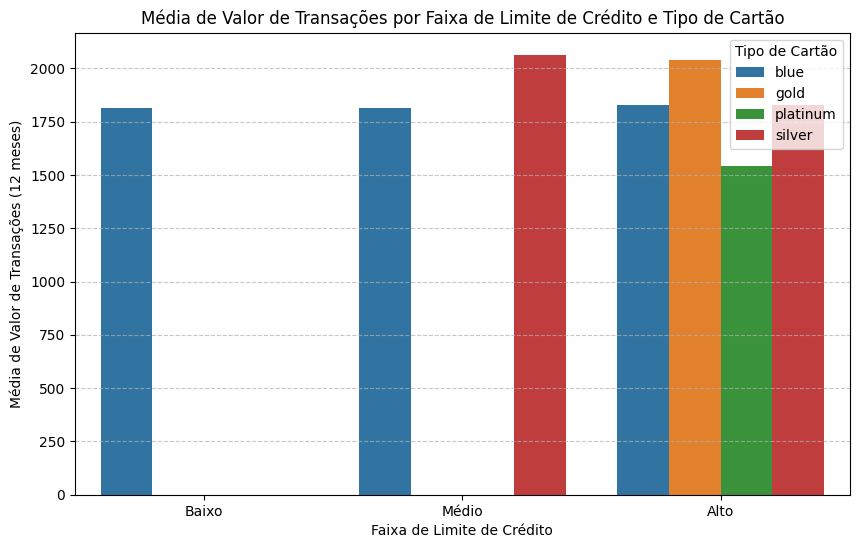

In [103]:
# Visualizar perfis
plt.figure(figsize=(10, 6))
sns.barplot(data=perfil_limite, x='faixa_limite_credito', y='valor_transacoes_12m', hue='tipo_cartao')
plt.title("Média de Valor de Transações por Faixa de Limite de Crédito e Tipo de Cartão")
plt.xlabel("Faixa de Limite de Crédito")
plt.ylabel("Média de Valor de Transações (12 meses)")
plt.legend(title="Tipo de Cartão")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [104]:
# Perfil por faixa de idade e estado civil
perfil_idade = data.groupby(['faixa_etaria', 'estado_civil']).agg({
    'valor_transacoes_12m': 'mean',
    'limite_credito': 'mean'
}).reset_index()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\981376694.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_idade = data.groupby(['faixa_etaria', 'estado_civil']).agg({


In [105]:
print("\nPerfil por Faixa Etária e Estado Civil:")
perfil_idade


Perfil por Faixa Etária e Estado Civil:


,faixa_etaria,estado_civil,valor_transacoes_12m,limite_credito
0,18-25,casado,NaN,NaN
1,18-25,divorciado,NaN,NaN
2,18-25,na,NaN,NaN
3,18-25,solteiro,NaN,NaN
4,26-35,casado,1967.291526,5987.623474
5,26-35,divorciado,2500.575313,7950.695000
6,26-35,na,1462.470000,12991.541667
7,26-35,solteiro,2394.052033,8031.576868
8,36-45,casado,1852.874765,8875.337159
9,36-45,divorciado,1851.601429,10350.437143


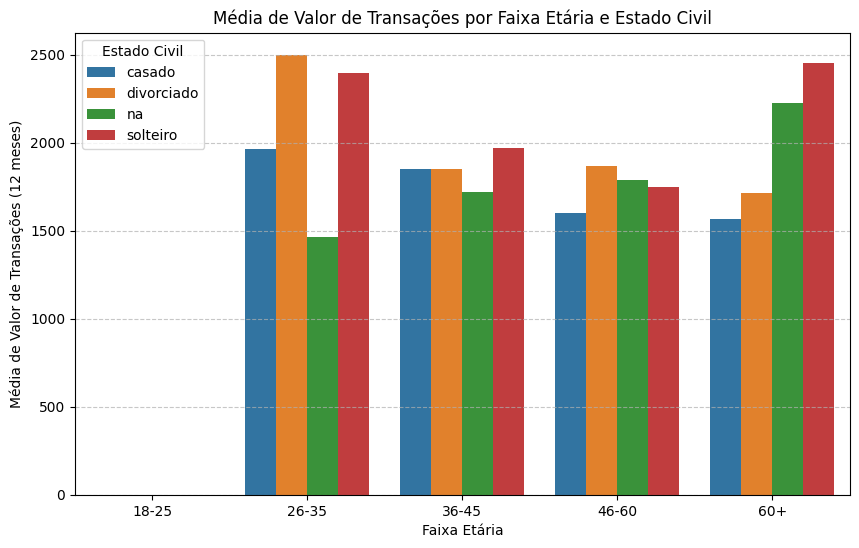

In [106]:
# Visualizar perfis
plt.figure(figsize=(10, 6))
sns.barplot(data=perfil_idade, x='faixa_etaria', y='valor_transacoes_12m', hue='estado_civil')
plt.title("Média de Valor de Transações por Faixa Etária e Estado Civil")
plt.xlabel("Faixa Etária")
plt.ylabel("Média de Valor de Transações (12 meses)")
plt.legend(title="Estado Civil")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Se houver variáveis relacionadas ao tempo, observar como os padrões mudam ao longo do período.

A análise temporal nos ajuda a entender como os padrões mudam ao longo do tempo. Variáveis relacionadas ao comportamento temporal, como interações mensais, meses inativos ou transações ao longo do ano, podem revelar tendências sazonais, comportamentos de fidelidade ou períodos de maior atividade. Isso é valioso para estratégias como campanhas sazonais ou ações de retenção de clientes.

**Objetivos da Etapa**
- Observar tendências e variações nas variáveis temporais.
- Identificar padrões sazonais ou mudanças comportamentais.
- Criar visualizações para comunicar os resultados de forma clara.

In [107]:
# Analisar iteracoes_12m
iteracoes_summary = data.groupby('iteracoes_12m').agg({
    'valor_transacoes_12m': 'mean',
    'meses_inativo_12m': 'mean'
}).reset_index()

In [109]:
print("\nResumo de Interações nos Últimos 12 Meses:")
iteracoes_summary


Resumo de Interações nos Últimos 12 Meses:


,iteracoes_12m,valor_transacoes_12m,meses_inativo_12m
0,0,1595.969818,2.169697
1,1,1840.540184,2.245399
2,2,1815.628002,2.228637
3,3,1733.885293,2.320191
4,4,2013.891058,2.304979
5,5,2150.621961,2.215686


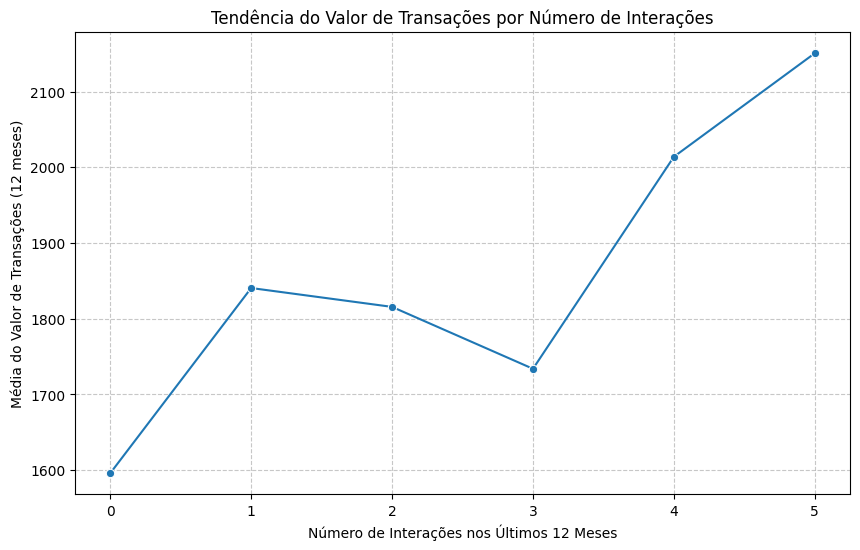

In [110]:
# Gráfico de tendência: Iterações vs Valor de Transações
plt.figure(figsize=(10, 6))
sns.lineplot(data=iteracoes_summary, x='iteracoes_12m', y='valor_transacoes_12m', marker='o')
plt.title("Tendência do Valor de Transações por Número de Interações")
plt.xlabel("Número de Interações nos Últimos 12 Meses")
plt.ylabel("Média do Valor de Transações (12 meses)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [111]:
# Analisar meses inativos
meses_inativos_summary = data.groupby('meses_inativo_12m').agg({
    'valor_transacoes_12m': 'mean',
    'limite_credito': 'mean'
}).reset_index()

print("\nResumo por Meses Inativos nos Últimos 12 Meses:")
meses_inativos_summary


Resumo por Meses Inativos nos Últimos 12 Meses:


,meses_inativo_12m,valor_transacoes_12m,limite_credito
0,0,1533.523333,8914.173333
1,1,1806.331220,8890.529604
2,2,1836.506510,9446.430990
3,3,1823.408732,8913.286533
4,4,1771.419897,9347.016907
5,5,1692.541379,7306.789655
6,6,1919.870370,8402.746296


C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\2963282519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=meses_inativos_summary, x='meses_inativo_12m', y='valor_transacoes_12m', palette='viridis')


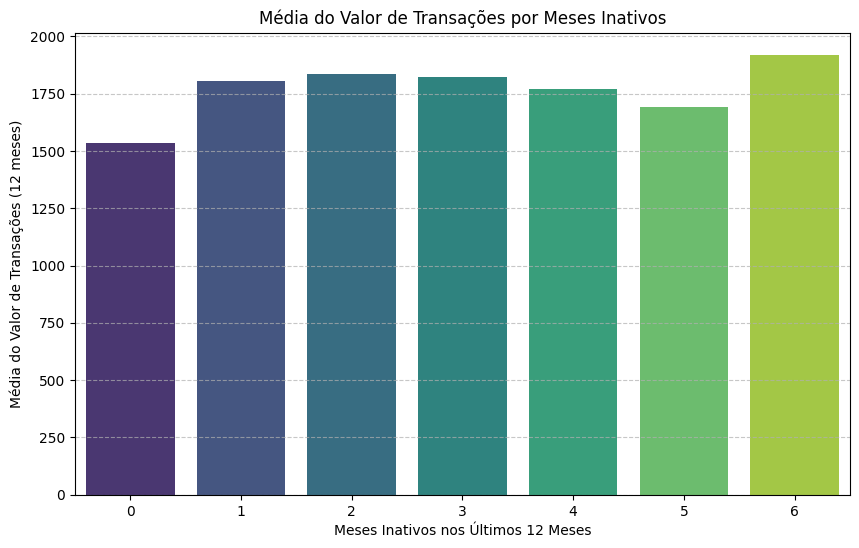

In [112]:
# Gráfico de tendência: Meses Inativos vs Valor de Transações
plt.figure(figsize=(10, 6))
sns.barplot(data=meses_inativos_summary, x='meses_inativo_12m', y='valor_transacoes_12m', palette='viridis')
plt.title("Média do Valor de Transações por Meses Inativos")
plt.xlabel("Meses Inativos nos Últimos 12 Meses")
plt.ylabel("Média do Valor de Transações (12 meses)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

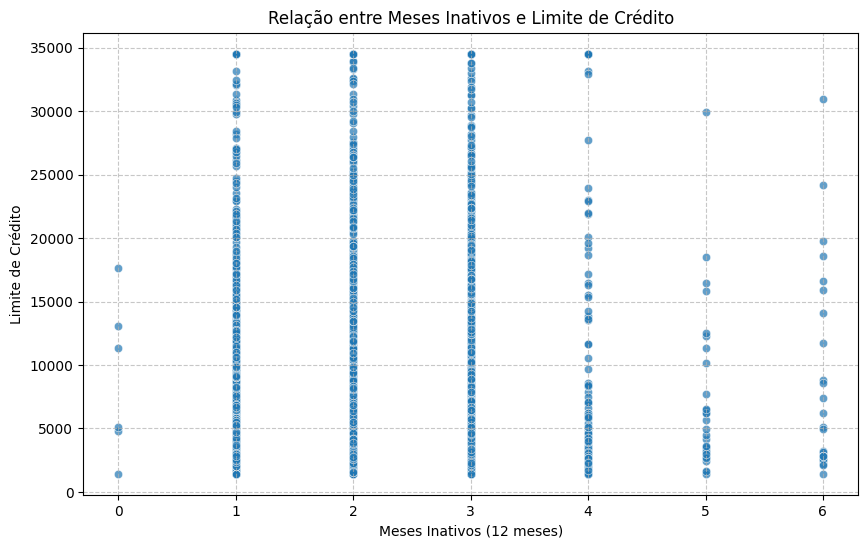

In [113]:
# Scatter plot: Meses Inativos vs Limite de Crédito
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='meses_inativo_12m', y='limite_credito', alpha=0.7)
plt.title("Relação entre Meses Inativos e Limite de Crédito")
plt.xlabel("Meses Inativos (12 meses)")
plt.ylabel("Limite de Crédito")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Explorar variações em hábitos ou comportamentos dos clientes.

Comportamentos dos clientes muitas vezes não são estáticos, mas variam com o tempo devido a mudanças pessoais, financeiras ou sazonais. Nesta etapa, buscamos entender essas variações, identificando padrões como aumentos ou quedas no uso de serviços, fidelidade, ou níveis de inatividade. Analisar essas dinâmicas nos permite prever tendências e criar estratégias mais eficazes.

*Objetivos da Etapa*
- Identificar mudanças nos padrões de comportamento, como frequência de transações e interações.
- Observar variações em comportamentos por grupos específicos de clientes.
- Visualizar e interpretar essas mudanças para insights estratégicos.

In [114]:
# Resumo por faixa etária
faixa_etaria_summary = data.groupby('faixa_etaria').agg({
    'iteracoes_12m': 'mean',
    'valor_transacoes_12m': 'mean'
}).reset_index()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\2878550375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_etaria_summary = data.groupby('faixa_etaria').agg({


In [115]:
print("\nResumo de Hábitos por Faixa Etária:")
faixa_etaria_summary


Resumo de Hábitos por Faixa Etária:


,faixa_etaria,iteracoes_12m,valor_transacoes_12m
0,18-25,NaN,NaN
1,26-35,2.826829,2190.966073
2,36-45,2.526506,1879.766759
3,46-60,2.503497,1662.512238
4,60+,2.605556,1704.997889


C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\1856555455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faixa_etaria_summary, x='faixa_etaria', y='valor_transacoes_12m', palette='viridis')


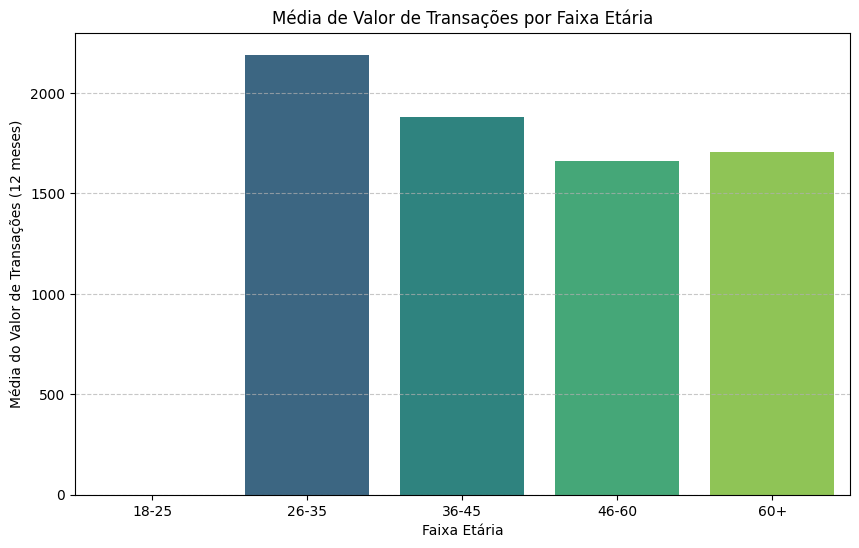

In [116]:
# Gráfico de variação por faixa etária
plt.figure(figsize=(10, 6))
sns.barplot(data=faixa_etaria_summary, x='faixa_etaria', y='valor_transacoes_12m', palette='viridis')
plt.title("Média de Valor de Transações por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Média do Valor de Transações (12 meses)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [118]:
# Resumo por tipo de cartão
tipo_cartao_summary = data.groupby('tipo_cartao').agg({
    'valor_transacoes_12m': ['mean', 'std']
}).reset_index()
tipo_cartao_summary.columns = ['tipo_cartao', 'media_valor_transacoes', 'desvio_valor_transacoes']

In [119]:
print("\nResumo de Hábitos por Tipo de Cartão:")
tipo_cartao_summary


Resumo de Hábitos por Tipo de Cartão:


,tipo_cartao,media_valor_transacoes,desvio_valor_transacoes
0,blue,1816.732055,680.813137
1,gold,2040.231875,1012.541423
2,platinum,1543.225000,546.756176
3,silver,1883.249785,828.830602


C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_7140\3075468008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tipo_cartao_summary, x='tipo_cartao', y='media_valor_transacoes', palette='coolwarm')


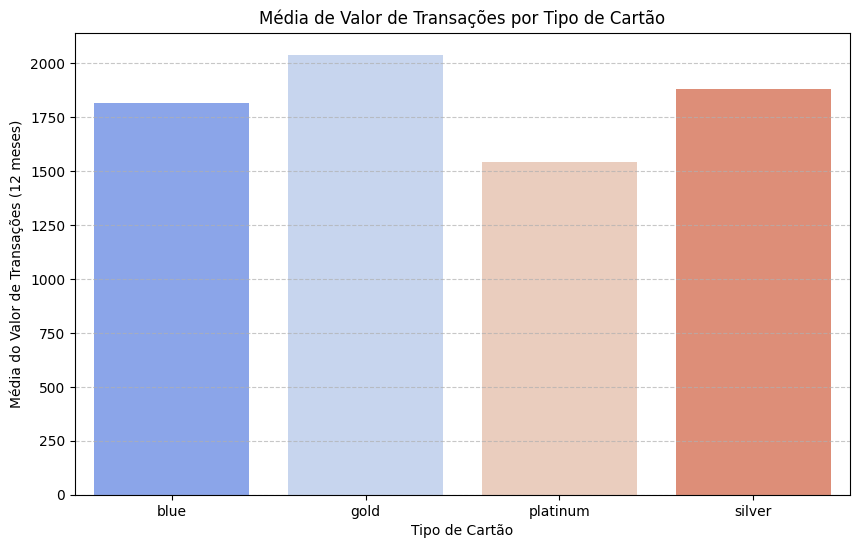

In [120]:
# Gráfico de variação por tipo de cartão
plt.figure(figsize=(10, 6))
sns.barplot(data=tipo_cartao_summary, x='tipo_cartao', y='media_valor_transacoes', palette='coolwarm')
plt.title("Média de Valor de Transações por Tipo de Cartão")
plt.xlabel("Tipo de Cartão")
plt.ylabel("Média do Valor de Transações (12 meses)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

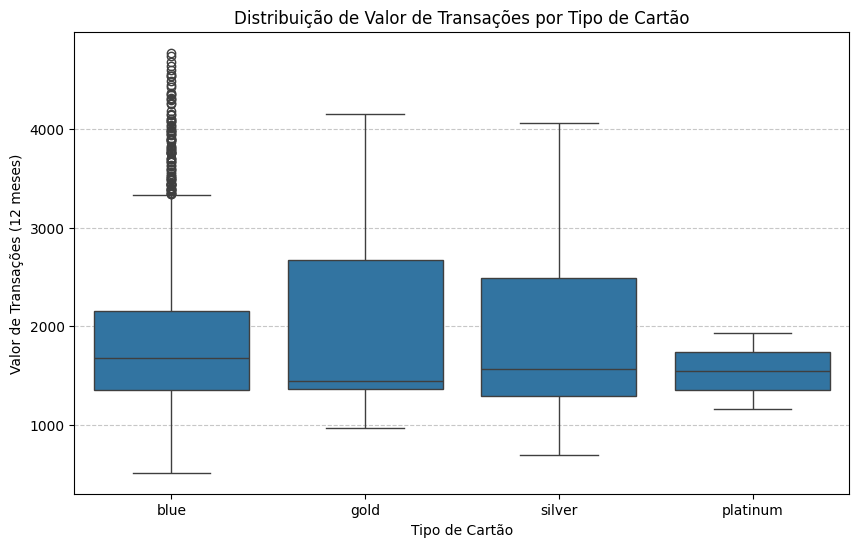

In [121]:
# Boxplot de variações em transações por tipo de cartão
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tipo_cartao', y='valor_transacoes_12m')
plt.title("Distribuição de Valor de Transações por Tipo de Cartão")
plt.xlabel("Tipo de Cartão")
plt.ylabel("Valor de Transações (12 meses)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conectar insights aos contextos de negócio e decisões estratégicas.

Transformar insights em ações requer que as descobertas estejam alinhadas aos objetivos de negócios e contextos estratégicos. Nesta etapa, conectamos os padrões e tendências identificados a oportunidades reais de otimização, segmentação ou crescimento. Este processo envolve traduzir dados técnicos em recomendações claras e acionáveis.

## Perfil dos Clientes:

- Insight: Clientes entre 26-35 anos têm o maior valor médio de transações e uma interação moderada com o sistema.
- Decisão Estratégica: Criar campanhas específicas para esta faixa etária, oferecendo incentivos para aumentar a interação e fidelizar esses clientes.

## Tipos de Cartão:

- Insight: Cartões do tipo "Premium" apresentam o maior valor de transações, mas são menos comuns.
- Decisão Estratégica: Ampliar os benefícios associados ao cartão "Premium" e promover upgrades para clientes com bom histórico.

## Correlação Entre Limite e Transações:

- Insight: Existe uma correlação positiva entre limite de crédito e valor de transações.
- Decisão Estratégica: Aumentar limites de crédito para clientes que apresentam bom comportamento financeiro pode gerar maior volume de transações.

## Clientes Inativos:

- Insight: Clientes com mais de 6 meses de inatividade têm um valor médio de transações muito baixo.
- Decisão Estratégica: Implementar campanhas de reativação com ofertas personalizadas para clientes inativos.

## Clusters de Clientes:

- Insight: Segmentos de clientes com limites baixos e transações baixas representam um grupo de menor rentabilidade.
- Decisão Estratégica: Desenvolver produtos financeiros mais simples e acessíveis para este segmento, reduzindo custos e aumentando a retenção.